# Visualize E-GEOD-33245 patterns
This notebook will examine patterns of generic and experiment-specific genes using E-GEOD-33245 as the template experiment

This experiment contains multiple comparisons/conditions:

* grp_1v2 compares WT vs *crc* mutants
* grp_1v3 compares WT vs *cbrB* mutants
* grp_1v4 compares WT vs *crcZ* mutant
* grp_1v5 compares WT in LB vs WT in BSM

In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import seaborn as sns
import numpy as np

from generic_expression_patterns_modules import process

/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [2]:
# Load data
# Summary data using abs value of test statistic
grp_1v2_file = "generic_gene_summary_E-GEOD-33245_1v2.tsv"
grp_1v3_file = "generic_gene_summary_E-GEOD-33245_1v3.tsv"
grp_1v4_file = "generic_gene_summary_E-GEOD-33245_1v4.tsv"
grp_1v5_file = "generic_gene_summary_E-GEOD-33245_1v5.tsv"

# Summary data using raw value of test statistic to get directionality
grp_1v2_raw_file = "generic_gene_summary_E-GEOD-33245_1v2_raw.tsv"
grp_1v3_raw_file = "generic_gene_summary_E-GEOD-33245_1v3_raw.tsv"
grp_1v4_raw_file = "generic_gene_summary_E-GEOD-33245_1v4_raw.tsv"
grp_1v5_raw_file = "generic_gene_summary_E-GEOD-33245_1v5_raw.tsv"

## Create dataframe to compare trends
We are going to merge data across different conditions. For example, we will merge `grp_1v2` and `grp_1v3` to use for plotting later in this notebook. The Hogan lab can look at these tables to find *things of interest* as we start looking into how to use our computational predictions of generic and specific genes. 

In [3]:
# Read data
grp_1v2 = pd.read_csv(grp_1v2_file, sep="\t", header=0, index_col=0)
grp_1v3 = pd.read_csv(grp_1v3_file, sep="\t", header=0, index_col=0)
grp_1v4 = pd.read_csv(grp_1v4_file, sep="\t", header=0, index_col=0)
grp_1v5 = pd.read_csv(grp_1v5_file, sep="\t", header=0, index_col=0)

grp_1v2_raw = pd.read_csv(grp_1v2_raw_file, sep="\t", header=0, index_col=0)
grp_1v3_raw = pd.read_csv(grp_1v3_raw_file, sep="\t", header=0, index_col=0)
grp_1v4_raw = pd.read_csv(grp_1v4_raw_file, sep="\t", header=0, index_col=0)
grp_1v5_raw = pd.read_csv(grp_1v5_raw_file, sep="\t", header=0, index_col=0)

In [4]:
# Merge summary dfs using abs log2 FC and using raw values
merged_1v2s_df = process.merge_abs_raw_dfs(grp_1v2, grp_1v2_raw, '1v2')
merged_1v3s_df = process.merge_abs_raw_dfs(grp_1v3, grp_1v3_raw, '1v3')
merged_1v4s_df = process.merge_abs_raw_dfs(grp_1v4, grp_1v4_raw, '1v4')
merged_1v5s_df = process.merge_abs_raw_dfs(grp_1v5, grp_1v5_raw, '1v5')

In [5]:
# Merge 1v2 and 1v3 summary dfs
merged_1v2_1v3_df = process.merge_two_conditions_df(merged_1v2s_df, merged_1v3s_df, '1v2', '1v3')
merged_1v2_1v3_df.head()

,Gene ID,Gene ID Name,Test statistic (Real)_grp_1v2,Test statistic (Real)_grp_1v2_raw,Adj P-value (Real)_grp_1v2,Mean test statistic (simulated)_grp_1v2,Std deviation (simulated)_grp_1v2,Median adj p-value (simulated)_grp_1v2,Test statistic (Real)_grp_1v3,Test statistic (Real)_grp_1v3_raw,Adj P-value (Real)_grp_1v3,Mean test statistic (simulated)_grp_1v3,Std deviation (simulated)_grp_1v3,Median adj p-value (simulated)_grp_1v3,Z score_grp_1v2,Z score_grp_1v3,max Z score
0,PA5530,PA5530,4.2550,4.2550,0.000088,0.49472,0.443135,0.658782,0.3175,0.3175,0.395383,0.21108,0.292025,0.969671,8.485636,0.364421,8.485636
1,PA0523,PA0523 norC,3.5580,-3.5580,0.001303,0.45682,0.290028,0.856209,0.4245,-0.4245,0.425676,0.22378,0.195986,0.970813,10.692710,1.024156,10.692710
2,PA0524,PA0524 norB,3.2585,-3.2585,0.001303,0.57044,0.331890,0.698655,0.3065,-0.3065,0.485255,0.25394,0.210468,0.969671,8.099239,0.249729,8.099239
3,PA5332,PA5332 crc,2.9380,-2.9380,0.053071,0.11008,0.079361,0.950597,0.2925,0.2925,0.441874,0.09666,0.079667,0.981874,35.633647,2.458221,35.633647
4,PA3874,PA3874 narH,2.8230,-2.8230,0.006250,0.33770,0.229561,0.826863,2.5420,-2.5420,0.000348,0.20082,0.229705,0.962749,10.826302,10.192097,10.826302


In [6]:
# Merge 1v3 and 1v4 summaries
merged_1v3_1v4_df = process.merge_two_conditions_df(merged_1v3s_df, merged_1v4s_df, '1v3', '1v4')
merged_1v3_1v4_df.head()

,Gene ID,Gene ID Name,Test statistic (Real)_grp_1v3,Test statistic (Real)_grp_1v3_raw,Adj P-value (Real)_grp_1v3,Mean test statistic (simulated)_grp_1v3,Std deviation (simulated)_grp_1v3,Median adj p-value (simulated)_grp_1v3,Test statistic (Real)_grp_1v4,Test statistic (Real)_grp_1v4_raw,Adj P-value (Real)_grp_1v4,Mean test statistic (simulated)_grp_1v4,Std deviation (simulated)_grp_1v4,Median adj p-value (simulated)_grp_1v4,Z score_grp_1v3,Z score_grp_1v4,max Z score
0,PA4726,PA4726 cbrB,4.5310,-4.5310,0.000010,0.12436,0.076626,0.962165,0.1960,-0.1960,0.747843,0.11102,0.125418,0.951414,57.508783,0.677577,57.508783
1,PA1985,PA1985 pqqA,2.9735,2.9735,0.000927,0.42170,0.278023,0.969671,2.8720,2.8720,0.000230,0.34312,0.277717,0.893453,9.178372,9.105944,9.178372
2,PA4131,PA4131,2.8815,-2.8815,0.000348,0.32658,0.217609,0.964949,1.5115,-1.5115,0.003054,0.32004,0.195527,0.916404,11.740890,6.093573,11.740890
3,PA4739,PA4739,2.7850,2.7850,0.000223,0.33814,0.430420,0.962165,2.1275,2.1275,0.000488,0.27102,0.224626,0.916404,5.684825,8.264750,8.264750
4,PA1216,PA1216,2.6005,2.6005,0.000223,0.30262,0.202536,0.962165,1.8350,1.8350,0.000488,0.36892,0.182870,0.893453,11.345563,8.017062,11.345563


In [7]:
# Merge 1v2 and 1v4 summaries
merged_1v2_1v4_df = process.merge_two_conditions_df(merged_1v2s_df, merged_1v4s_df, '1v2', '1v4')
merged_1v2_1v4_df.head()

,Gene ID,Gene ID Name,Test statistic (Real)_grp_1v2,Test statistic (Real)_grp_1v2_raw,Adj P-value (Real)_grp_1v2,Mean test statistic (simulated)_grp_1v2,Std deviation (simulated)_grp_1v2,Median adj p-value (simulated)_grp_1v2,Test statistic (Real)_grp_1v4,Test statistic (Real)_grp_1v4_raw,Adj P-value (Real)_grp_1v4,Mean test statistic (simulated)_grp_1v4,Std deviation (simulated)_grp_1v4,Median adj p-value (simulated)_grp_1v4,Z score_grp_1v2,Z score_grp_1v4,max Z score
0,PA5530,PA5530,4.2550,4.2550,0.000088,0.49472,0.443135,0.658782,0.4275,0.4275,0.294094,0.13284,0.113713,0.929139,8.485636,2.591269,8.485636
1,PA0523,PA0523 norC,3.5580,-3.5580,0.001303,0.45682,0.290028,0.856209,1.2045,-1.2045,0.013947,0.24292,0.250192,0.942004,10.692710,3.843363,10.692710
2,PA0524,PA0524 norB,3.2585,-3.2585,0.001303,0.57044,0.331890,0.698655,0.9735,-0.9735,0.030967,0.24528,0.223663,0.916404,8.099239,3.255882,8.099239
3,PA5332,PA5332 crc,2.9380,-2.9380,0.053071,0.11008,0.079361,0.950597,0.3555,-0.3555,0.517578,0.08512,0.064780,0.929139,35.633647,4.173801,35.633647
4,PA3874,PA3874 narH,2.8230,-2.8230,0.006250,0.33770,0.229561,0.826863,2.2480,-2.2480,0.000183,0.17956,0.167214,0.940064,10.826302,12.369997,12.369997


In [8]:
# Save
merged_1v2_1v3_df.to_csv("merged_E-GEOD_1v2_1v3_directionality.tsv", sep="\t")
merged_1v2_1v4_df.to_csv("merged_E-GEOD_1v2_1v4_directionality.tsv", sep="\t")
merged_1v3_1v4_df.to_csv("merged_E-GEOD_1v3_1v4_directionality.tsv", sep="\t")

## Compare trends across different conditions

We want to compare across different conditions. For example, given:
* Group 1v2: WT vs *crc* mutant
* Group 1v3: WT vs *cbr* mutant

We can then compare the test statistic between these two groups above. We hope to see that,
* Genes 1v3  > 1v2 are genes that change more in 1v3 than 1v2 and we guess are specific to 1v3 (high z-score)
* Genes 1v3 < 1v2 are genes that change more in 1v2 than 1v3 and we guess are specific to 1v2 (high z-score)
* Genes on the 1v3 = 1v2 line are those genes that change equally in both and we guess are generic genes (low z-score)

### 1v2 compared with 1v3

Figure(720x288)


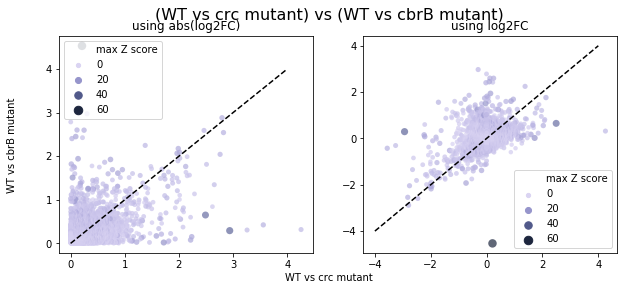

In [9]:
process.plot_two_conditions(merged_1v2_1v3_df, "1v2", "1v3", "WT vs crc mutant", "WT vs cbrB mutant")

### 1v2 compared with 1v4

Figure(720x288)


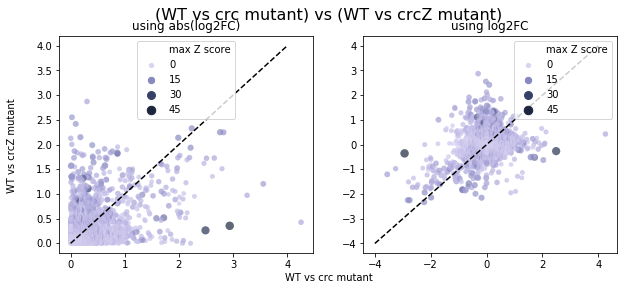

In [10]:
process.plot_two_conditions(merged_1v2_1v4_df, "1v2", "1v4", "WT vs crc mutant", "WT vs crcZ mutant")

### 1v3 compared with 1v4

Figure(720x288)


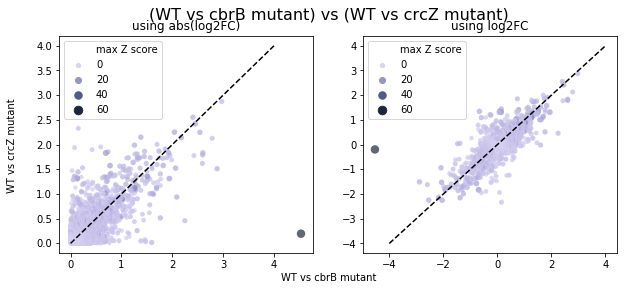

In [11]:
process.plot_two_conditions(merged_1v3_1v4_df, "1v3", "1v4", "WT vs cbrB mutant", "WT vs crcZ mutant")

**Takeaway:**
Genes with high specificity score (i.e. genes with a high absolute value z-score) are located in the off x-y regions, as expected since these off diagonal regions represent those genes that are more differentially expressed in one condition versus the other. This shows some promise for using z-score to distinguish between generic and specific genes and we can start looking more into these trends.

## DEGs found using traditional criteria and using z-score

When performing DE analysis, this can return hundreds of genes using traditional criteria (FDR adjusted p-value < 0.05 and log2 fold change > 2). We want to see what genes are selected when we add z-score as an additional criteria to indicate genes that are specific to the pertubagen in question.

### 1v2

In [12]:
(DEGs_1v2_df,
 degs_1v2_traditional,
 degs_1v2_specific,
 degs_1v2_generic,
 degs_1v2_intersect,
 degs_1v2_intersect_generic,
 degs_1v2_diff) = process.get_and_save_DEG_lists(merged_1v2s_df, '1v2')

No. of DEGs using traditional criteria: 93
No. of specific DEGs using z-score: 75
No. of generic DEGs using z-score: 90
No. of traditional DEGs that are specific by z-score criteria: 53
No. of specific DEGs that were not found by traditional criteria: 22
No. of traditional DEGs that are generic by z-score criteria: 40


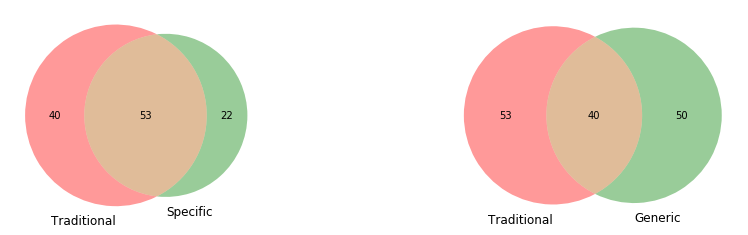

In [13]:
process.plot_venn(degs_1v2_traditional, degs_1v2_specific, degs_1v2_generic)

Figure(1080x288)


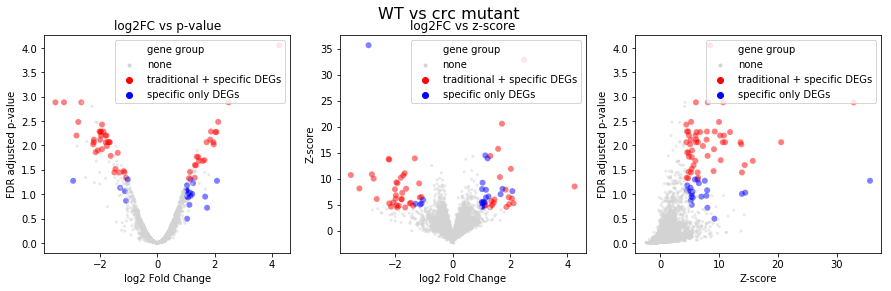

In [14]:
process.plot_volcanos(degs_1v2_intersect, degs_1v2_diff, merged_1v2s_df, "1v2", "WT vs crc mutant")

### 1v3

In [15]:
(DEGs_1v3_df,
 degs_1v3_traditional,
 degs_1v3_specific,
 degs_1v3_generic,
 degs_1v3_intersect,
 degs_1v3_intersect_generic,
 degs_1v3_diff) = process.get_and_save_DEG_lists(merged_1v3s_df, '1v3')

No. of DEGs using traditional criteria: 146
No. of specific DEGs using z-score: 123
No. of generic DEGs using z-score: 26
No. of traditional DEGs that are specific by z-score criteria: 121
No. of specific DEGs that were not found by traditional criteria: 2
No. of traditional DEGs that are generic by z-score criteria: 25


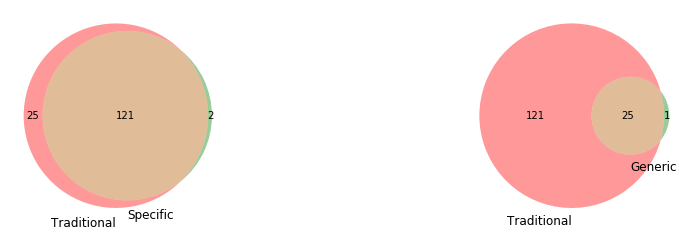

In [16]:
process.plot_venn(degs_1v3_traditional, degs_1v3_specific, degs_1v3_generic)

Figure(1080x288)


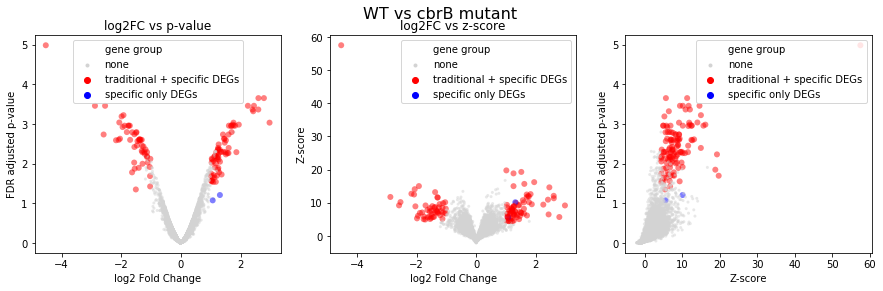

In [17]:
process.plot_volcanos(degs_1v3_intersect, degs_1v3_diff, merged_1v3s_df, "1v3", "WT vs cbrB mutant")

### 1v4

In [18]:
(DEGs_1v4_df,
 degs_1v4_traditional,
 degs_1v4_specific,
 degs_1v4_generic,
 degs_1v4_intersect, 
 degs_1v4_intersect_generic,
 degs_1v4_diff) = process.get_and_save_DEG_lists(merged_1v4s_df, '1v4')

No. of DEGs using traditional criteria: 155
No. of specific DEGs using z-score: 137
No. of generic DEGs using z-score: 25
No. of traditional DEGs that are specific by z-score criteria: 133
No. of specific DEGs that were not found by traditional criteria: 4
No. of traditional DEGs that are generic by z-score criteria: 22


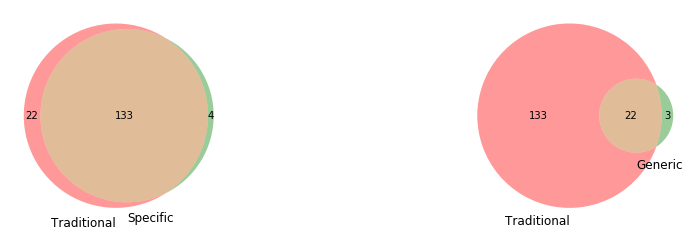

In [19]:
process.plot_venn(degs_1v4_traditional, degs_1v4_specific, degs_1v4_generic)

Figure(1080x288)


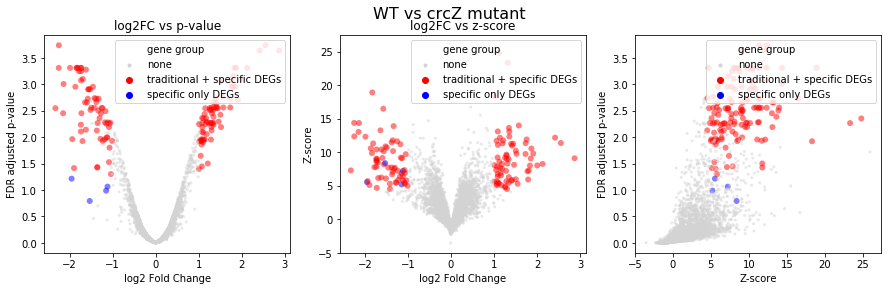

In [20]:
process.plot_volcanos(degs_1v4_intersect, degs_1v4_diff, merged_1v4s_df, "1v4", "WT vs crcZ mutant")

### 1v5

In [21]:
(DEGs_1v5_df,
 degs_1v5_traditional,
 degs_1v5_specific,
 degs_1v5_generic,
 degs_1v5_intersect,
 degs_1v5_intersect_generic,
 degs_1v5_diff) = process.get_and_save_DEG_lists(merged_1v5s_df, '1v5')

No. of DEGs using traditional criteria: 711
No. of specific DEGs using z-score: 117
No. of generic DEGs using z-score: 594
No. of traditional DEGs that are specific by z-score criteria: 117
No. of specific DEGs that were not found by traditional criteria: 0
No. of traditional DEGs that are generic by z-score criteria: 594


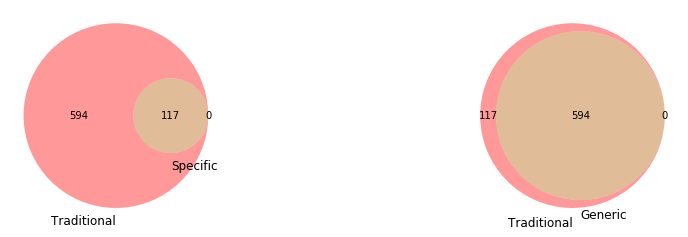

In [22]:
process.plot_venn(degs_1v5_traditional, degs_1v5_specific, degs_1v5_generic)

Figure(1080x288)


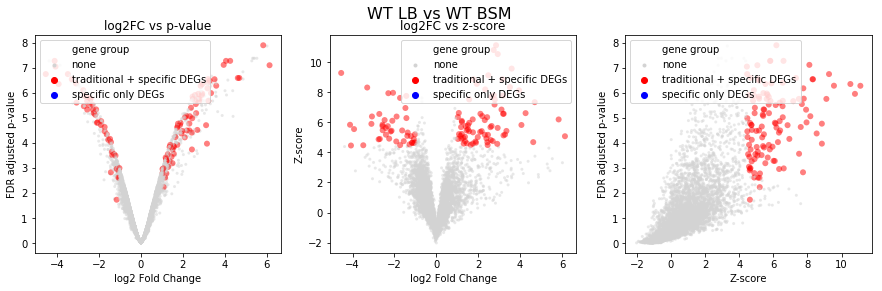

In [23]:
process.plot_volcanos(degs_1v5_intersect, degs_1v5_diff, merged_1v5s_df, "1v5", "WT LB vs WT BSM")

In [24]:
# Save DEGs to file to share with Hogan lab
degs_all_df = pd.DataFrame({'1v2 traditional + specific': pd.Series(degs_1v2_intersect),
                            '1v2 specific only': pd.Series(degs_1v2_diff),
                            '1v2 traditional + generic': pd.Series(degs_1v2_intersect_generic),
                            '1v3 traditional + specific': pd.Series(degs_1v3_intersect),
                            '1v3 specific only': pd.Series(degs_1v3_diff),
                            '1v3 traditional + generic': pd.Series(degs_1v3_intersect_generic),
                            '1v4 traditional + specific': pd.Series(degs_1v4_intersect),
                            '1v4 specific only': pd.Series(degs_1v4_diff),
                            '1v4 traditional + generic': pd.Series(degs_1v4_intersect_generic),
                            '1v5 traditional + specific': pd.Series(degs_1v5_intersect),
                            '1v5 specific only': pd.Series(degs_1v5_diff),
                            '1v5 traditional + generic': pd.Series(degs_1v5_intersect_generic)                            
                           })
degs_all_df.to_csv("DEGs_E_GEOD_33245.tsv", sep="\t")

**Takeaway:**
* Overall it looks like we find on the order of hundreds of DEGs using the traditional criteria (p-value and log2 fold change), but if we filter by high absolute z-score we get a reduced set of genes. In some cases the reduced set is of a similar size to the traditional set (i.e. 1v4) but other times the reduced set is signficantly smaller (i.e. 1v5).
* Using traditional DE criteria you find a mix of generic and specific genes. And applying a z-score cutoff will supply researchers with a reasonable sized list of DEGs that are most relevant to the perturbagen in question that they can follow up with.
* There are also some specific genes that are missed by the traditional DE criteria because they are just shy of being significant based on the FDR p-value cutoff. Perhaps these genes play an important niche role that would have otherwise been missed using traditional DE analysis.